In [66]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
df=pd.read_csv(r'C:\Users\DELL\Downloads\archive (10)\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

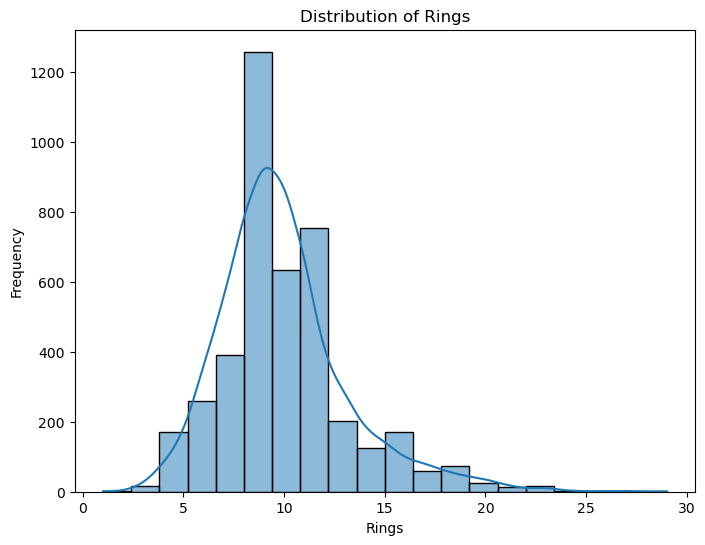

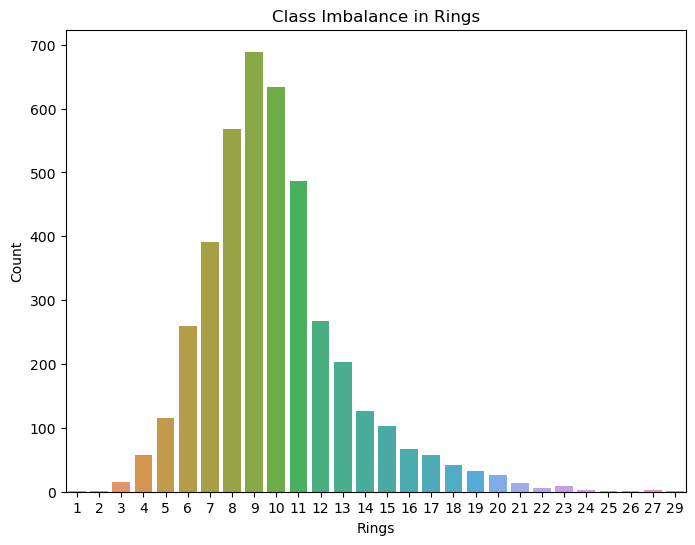

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

# Visualize the imbalance in the target classes
target_class = df['Rings']
plt.figure(figsize=(8, 6))
sns.countplot(x=target_class)
plt.title('Class Imbalance in Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [9]:
x,y=make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9,0.1], random_state=42)

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
class_weights={0:9,1:1}

In [44]:
clf=RandomForestClassifier(class_weight=class_weights,random_state=42)

In [45]:
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 9, 1: 1}, random_state=42)

In [71]:
y_pred0=clf.predict(x_test)

In [72]:
y_pred0

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [76]:
precision=precision_score(y_test, y_pred0 )
recall=recall_score(y_test, y_pred0)
f1=f1_score(y_test, y_pred0)
roc_auc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

In [77]:
print(precision)
print(recall)
print(f1)
print(roc_auc)

1.0
0.29411764705882354
0.45454545454545453
0.9757264351523742


In [78]:
clf1=RandomForestClassifier(class_weight='balanced',random_state=42)

In [79]:
clf1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
y_pred1=clf1.predict(x_test)

In [82]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0])

In [83]:
precision=precision_score(y_test, y_pred1 )
recall=recall_score(y_test, y_pred1)
f1=f1_score(y_test, y_pred1)
roc_auc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

In [84]:
print(precision)
print(recall)
print(f1)
print(roc_auc)

1.0
0.2647058823529412
0.4186046511627907
0.9757264351523742


In [56]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [57]:
brf=BalancedRandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
brf.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [85]:
y_pred2=brf.predict(x_test)

In [86]:
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0])

In [87]:
precision=precision_score(y_test, y_pred2 )
recall=recall_score(y_test, y_pred2)
f1=f1_score(y_test, y_pred2)
roc_auc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

In [88]:
print(precision)
print(recall)
print(f1)
print(roc_auc)

1.0
0.9117647058823529
0.9538461538461539
0.9757264351523742


In [62]:
from imblearn.ensemble import EasyEnsembleClassifier
eec=EasyEnsembleClassifier(n_estimators=10,random_state=42)

In [63]:
eec.fit(x_train,y_train)

EasyEnsembleClassifier(random_state=42)

In [91]:
y_pred3=eec.predict(x_test)

In [92]:
y_pred3

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0])

In [95]:
precision=precision_score(y_test, y_pred3 )
recall=recall_score(y_test, y_pred3)
f1=f1_score(y_test, y_pred3)
roc_auc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

In [96]:
print(precision)
print(recall)
print(f1)
print(roc_auc)

1.0
1.0
1.0
0.9757264351523742
